In [10]:
import json, matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import matplotlib.pyplot as plt

# Load the JSON data
with open('data.json', 'r') as file:
    data_array = json.load(file)


# Extract model names and their final testing accuracy

def plot_top_n(plt, func, int_val, number_of_top=5):
    data_array.sort(key=f, reverse=True)

    for model in data_array[:number_of_top]:
        if model["model_name"] == "BasicMLP":
            number_of_top += 1
            continue
        model_data = model

        # Extract relevant arrays
        accuracy_training = model_data["accuracy_training"]
        epochs_accuracy = np.arange(1, len(accuracy_training) + 1)
        accuracy_testing = model_data[int_val]

        loss_training = model_data["loss_training"]
        ## loss_validation = model_data["loss_validation"]
        ## epochs_loss = np.arange(1, len(loss_training) + 1)

        # plt.plot(epochs_accuracy, accuracy_training, label=model_name)
        plt.plot(epochs_accuracy, accuracy_testing,
                 label=model_data["model_name"])

    # add the basicMLP model for comparison
    model_data = data_array[0]
    accuracy_testing = model_data[int_val][:30]
    epochs_accuracy = np.arange(1, len(accuracy_testing) + 1)
    plt.plot(epochs_accuracy, accuracy_testing, label=model_data["model_name"])

    plt.set_xlabel('Epochs')
    plt.set_xlabel('Accuracy')
    plt.set_title(f'Top {number_of_top} params of {int_val} accuracy based on {func.__name__}')
    plt.legend()
    plt.grid(True)

In [11]:
def avg_func(i):
    return sum(i["accuracy_validation"]) / len(i["accuracy_validation"])


def max_func(i):
    return max(i["accuracy_validation"])


def afterfirst_epocha(i):
    return i["accuracy_validation"][0]


def min_func(i):
    return min(i["accuracy_validation"])


all_f = [avg_func, max_func, afterfirst_epocha, min_func]
fig, axs = plt.subplots(len(all_f), 1, figsize=(24, 30))

for f, n in zip(all_f, range(5)):
    plot_top_n(axs[n], f, "accuracy_validation", 5)

In [ ]:
def avg_func(i):
    return sum(i["loss_validation"]) / len(i["loss_validation"])


def max_func(i):
    return max(i["loss_validation"])


def afterfirst_epocha(i):
    return i["loss_validation"][0]


def min_func(i):
    return min(i["loss_validation"])


all_f = [avg_func, max_func, afterfirst_epocha, min_func]
fig, axs = plt.subplots(len(all_f), 1, figsize=(24, 30))

for f, n in zip(all_f, range(len(all_f))):
    plot_top_n(axs[n], f, "loss_validation", 5)

In [13]:
# Ploting time for epoch


# single plot site
plt.figure(figsize=(20, 6))

for model in data_array:
    time_for_epoch = model["time_trainings"]
    epochs_time = np.arange(1, len(time_for_epoch) + 1)
    plt.plot(epochs_time, time_for_epoch, 'x-',
             label=f'{model["model_name"]},avg={np.average(model["time_trainings"])}')
    plt.xlabel('Epochs')
    plt.xlabel('Accuracy')
    plt.title(f'Time for epocha based on model')
    plt.legend()
    plt.grid(True)

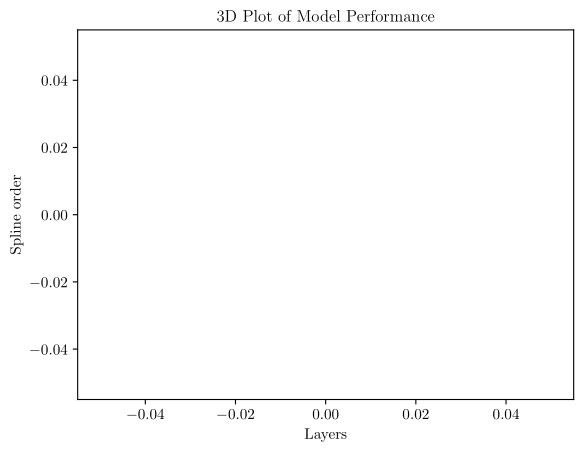

In [14]:
# 3d graph
x_value = []
y_value = []
z_value = []

for i in data_array:
    params = i["model_name"].split('_')[-5:-1]
    try:
        x_value.append(int(params[0]))  # This is '6'
        y_value.append(int(params[1]))  # This is '3'
        z_value.append(i["accuracy_testing"])
    except:
        pass

fig = plt.figure()
ax = fig.add_subplot(111)

# Plotting the point
ax.scatter(x_value, z_value, c='r', marker='o')

# Labeling the axes
ax.set_xlabel('Layers')
ax.set_ylabel('Spline order')


# Set title
ax.set_title('3D Plot of Model Performance')

fig

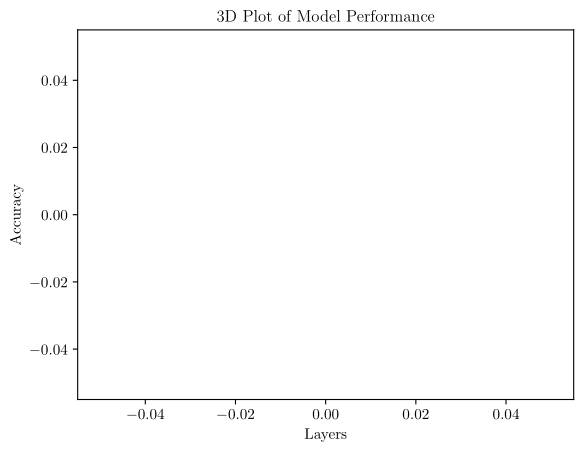

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Plotting the point
ax.scatter(y_value, z_value, c='r', marker='x')

# Labeling the axes
ax.set_xlabel('Layers')
ax.set_ylabel('Accuracy')


# Set title
ax.set_title('3D Plot of Model Performance')

fig

# Image for presentaion:

In [16]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size': 11,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [17]:
def max_func(i):
    return max(i["loss_validation"])


f = max_func
data_array.sort(key=f, reverse=True)
number_of_top = 25
int_val = "accuracy_validation"
plt.figure(figsize=(10, 5))

for model in data_array[:number_of_top]:
    if model["model_name"] == "BasicMLP":
        number_of_top += 1
        continue
    model_data = model

    # Extract relevant arrays
    accuracy_training = model_data["accuracy_training"]
    epochs_accuracy = np.arange(1, len(accuracy_training) + 1)
    accuracy_testing = model_data[int_val]

    loss_training = model_data["loss_training"]
    loss_validation = model_data["loss_validation"]
    epochs_loss = np.arange(1, len(loss_training) + 1)

    # plt.plot(epochs_accuracy, accuracy_training, label=model_name)
    plt.plot(epochs_accuracy, accuracy_testing,
             label=model_data["model_name"])

# add the basicMLP model for comparison
model_data = data_array[0]
accuracy_testing = model_data[int_val][:30]
epochs_accuracy = np.arange(1, len(accuracy_testing) + 1)
plt.plot(epochs_accuracy, accuracy_testing, label="MLP based")

plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.title(f'All model with different parameters compared with MLP (Validation dataset)')
plt.legend()
plt.grid(True)

plt.savefig("all_model_with_different_parameters_compared_with_MLP.pgf")

mpl.use("pgf")
# create your plot
plt.savefig("all_model_with_different_parameters_compared_with_MLP.pgf")

In [18]:
# Ploting time for epoch


# single plot site
plt.figure(figsize=(16, 10))

for model in data_array:
    time_for_epoch = np.array(model["time_trainings"])
    epochs_time = np.arange(1, len(time_for_epoch) + 1)
    plt.plot(epochs_time, time_for_epoch / (1000 * 60), 'x-',
             label=f'{model["model_name"]},avg={np.average(time_for_epoch / (1000 * 60))}')
    plt.ylabel('Minutes for epoch')
    plt.xlabel('Epoch')
    plt.title(f'Time for epocha')
    plt.legend()
    plt.grid(True)

mpl.use("pgf")
# create your plot
plt.savefig("time_for_epoch_based_on_model.pgf")